In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
dat = pd.read_csv('C:/Users/ikram/Desktop/UIB 4 курс/1 cем/Data Science/SRS 1/arithmetic_test.csv', delimiter=';')
dat.head()

,Name,Last name,age,male,att_test_missed,mental_arithm,iq,degree,student,fav_sub,predisposition,practiced,Unnamed: 12
0,Fabian Bager,Bager,23,1,30,15,79,1,0,Business,1,1,NaN
1,Robert Bergman,Bergman,19,1,49,17,81,0,0,Health,0,1,NaN
2,Nico Blomgren,Blomgren,16,1,0,30,107,1,1,Science,1,1,NaN
3,Jonas Blomgren,Blomgren,57,1,18,14,81,1,0,Mathematics,1,1,NaN
4,Alice Browm,Browm,83,0,7,29,103,0,0,Business,1,1,NaN


In [99]:
dat=dat.drop(["Name ", 'Last name', 'Unnamed: 12'], axis=1)

In [100]:
dat.isnull().sum()

age                0
male               0
att_test_missed    0
mental_arithm      0
iq                 0
degree             0
student            0
fav_sub            0
predisposition     0
practiced          0
dtype: int64

In [101]:
dat.head()

,age,male,att_test_missed,mental_arithm,iq,degree,student,fav_sub,predisposition,practiced
0,23,1,30,15,79,1,0,Business,1,1
1,19,1,49,17,81,0,0,Health,0,1
2,16,1,0,30,107,1,1,Science,1,1
3,57,1,18,14,81,1,0,Mathematics,1,1
4,83,0,7,29,103,0,0,Business,1,1


In [102]:
IQ=dat['iq']
IQ = IQ.sort_values().reset_index(drop=True)
print(IQ)

0      70
1      70
2      71
3      72
4      74
     ... 
57    120
58    122
59    129
60    130
61    130
Name: iq, Length: 62, dtype: int64


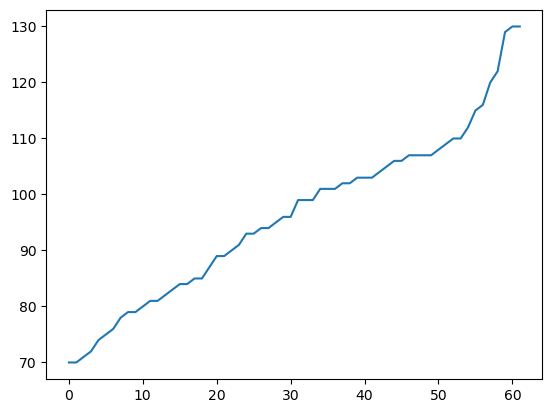

In [103]:
iq=dat['iq']

IQ.plot.line()
plt.show()

In [104]:
print(dat.groupby(['fav_sub'])['fav_sub'].count())

fav_sub
Art             6
Business       12
Dance           4
Health          9
Language        8
Literature      1
Mathematics     5
Music           4
Philosophy      4
Science         8
Society         1
Name: fav_sub, dtype: int64


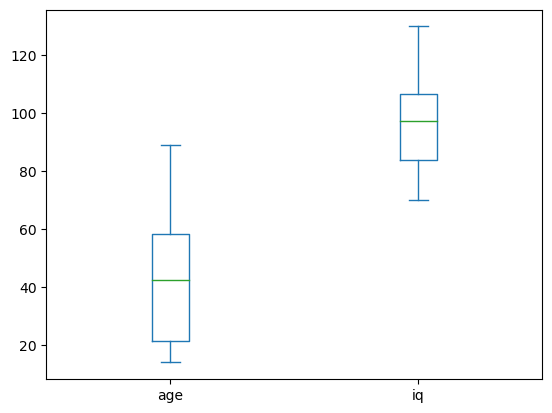

In [105]:
df_age = dat[['age', 'iq' ]]
df_age.plot(kind='box')
plt.show()

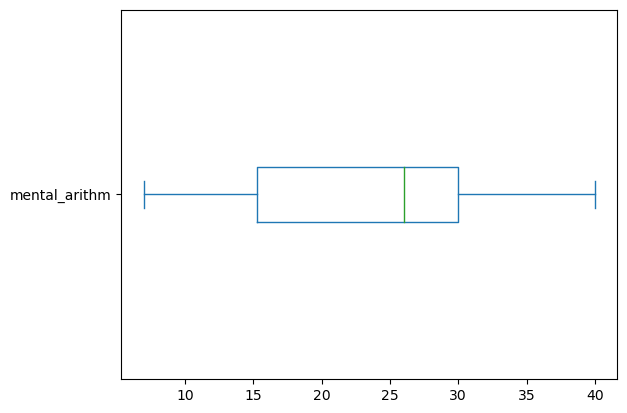

In [106]:
df_test = dat[['mental_arithm']]
df_test.plot(kind='box', vert=False)
plt.show()

<AxesSubplot:xlabel='mental_arithm'>

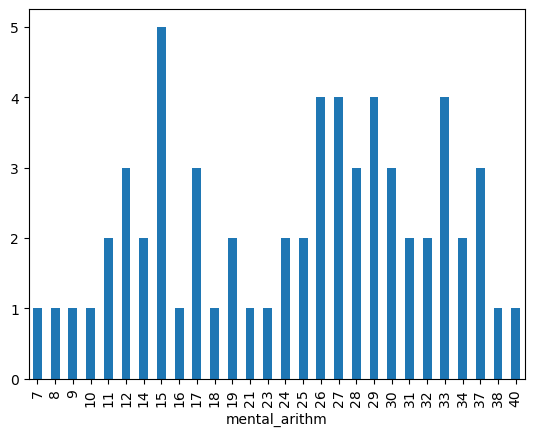

In [107]:
# print( df_test)

df_test1 = df_test.groupby(['mental_arithm'])['mental_arithm'].count()
# print(df_test )
df_test1.plot.bar()

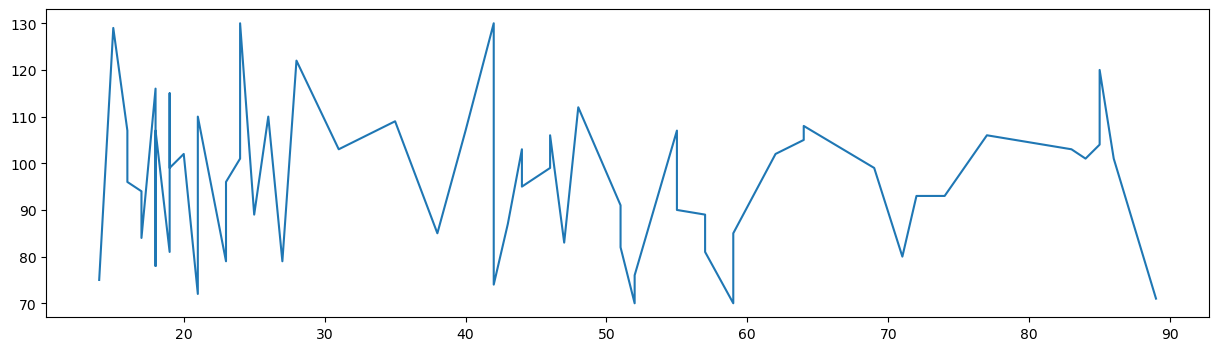

In [141]:
dat1=dat.sort_values(by='age').reset_index(drop=True)
age=dat1[['age']]
iq=dat1[['iq']]
plt.figure(figsize=(15,4))
plt.plot(age, iq)

<AxesSubplot:>

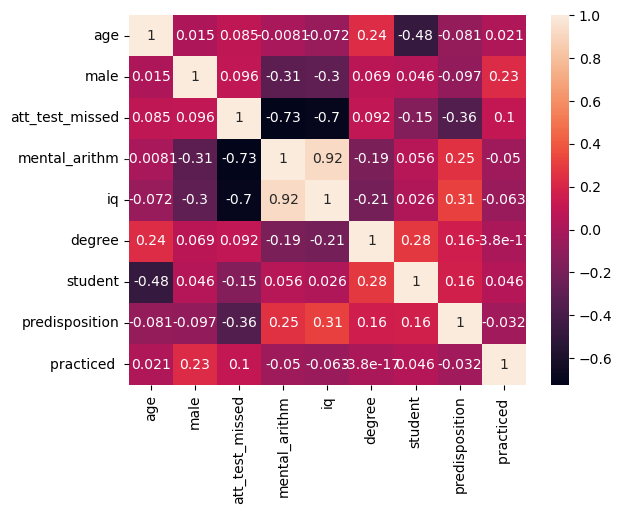

In [109]:
import seaborn as sns
sns.heatmap(pd.DataFrame(dat).corr(), annot=True)

In [144]:
# 3 Задание
X=dat.drop(columns = ["mental_arithm", "fav_sub"])
Y=dat[['mental_arithm']]

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=13)

x_train.shape

(43, 8)

In [164]:
y_train.shape

(43, 1)

In [166]:
from sklearn.linear_model import LinearRegression

model_3 = LinearRegression()

model_3.fit(x_train, y_train)

y_pred = model_3.predict(x_test)
y_pred1 = model_3.predict(X)
y_pred1.shape

(62, 1)

In [148]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

18.977391167967166


In [ ]:
# Формула 
mental_arithm = (const + coef_age * age + coef_male * male + coef_att_test_missed * att_test_missed + coef_iq * iq + 
    coef_degree * degree + coef_student * student + coef_predisposition * predisposition + coef_practiced * practiced)

In [151]:
# 5 Задание
import statsmodels.api as sm
X_train = sm.add_constant(x_train)
model_4 = sm.OLS(y_train, X_train).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:          mental_arithm   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     45.19
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           6.77e-16
Time:                        13:03:03   Log-Likelihood:                -102.47
No. Observations:                  43   AIC:                             222.9
Df Residuals:                      34   BIC:                             238.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -20.4311      4.949     

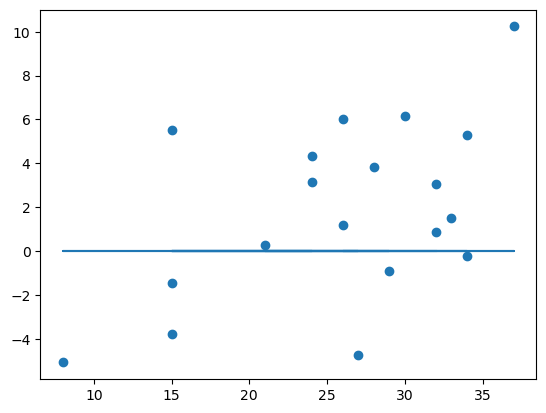

In [152]:
# 6.А Задание
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.plot(y_test, [0]*len(y_test))

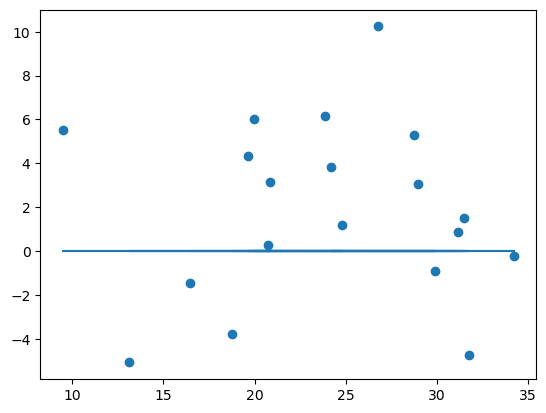

In [172]:
# 6.B Задание

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.plot(y_pred, [0]*len(y_pred))

(array([3., 0., 2., 3., 2., 3., 3., 2., 0., 1.]),
 array([-5.08339644, -3.55089342, -2.01839039, -0.48588737,  1.04661565,
         2.57911868,  4.1116217 ,  5.64412473,  7.17662775,  8.70913078,
        10.2416338 ]),
 <BarContainer object of 10 artists>)

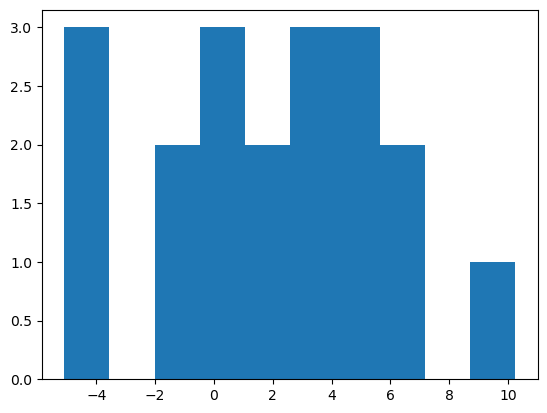

In [173]:
residuals = y_test - y_pred
plt.hist(residuals)

(array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 1., 1., 0., 0., 0., 0., 2., 0., 0., 1., 1., 0., 0., 1.,
        1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-5.08339644, -4.77689584, -4.47039523, -4.16389463, -3.85739402,
        -3.55089342, -3.24439281, -2.93789221, -2.6313916 , -2.324891  ,
        -2.01839039, -1.71188979, -1.40538918, -1.09888858, -0.79238797,
        -0.48588737, -0.17938677,  0.12711384,  0.43361444,  0.74011505,
         1.04661565,  1.35311626,  1.65961686,  1.96611747,  2.27261807,
         2.57911868,  2.88561928,  3.19211989,  3.49862049,  3.8051211 ,
         4.1116217 ,  4.41812231,  4.72462291,  5.03112352,  5.33762412,
         5.64412473,  5.95062533,  6.25712594,  6.56362654,  6.87012715,
         7.17662775,  7.48312836,  7.78962896,  8.09612957,  8.40263017,
         8.70913078,  9.01563138,  9.32213199,  9.62863259,  9.9351332 ,
        10.2416338 ]),
 <BarContainer object

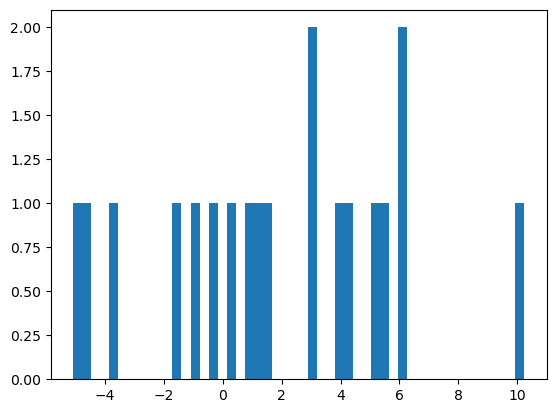

In [153]:
# 6.С Задание
plt.hist(residuals, bins=50)